In [1]:
import os
print(os.getcwd())
os.chdir("../src")

/home/mcb/users/rsarra2/rnabayespairing2/bayespairing/test


In [2]:
import random
from Bio import AlignIO
from Bio.Alphabet import IUPAC, Gapped
from Bio.Align import MultipleSeqAlignment
import warnings
warnings.filterwarnings('ignore')
import pickle
import find_rna3dmotif_modules
import draw_single_graph
import Rfam_to_module
from IPython.display import Image
import pickle
import statistics

# Basic Execution of BayesPairing2

## Searching for a module in a sequence

The core function of the BayesPairing package is ``parse_sequences.py``. It takes as input a sequence and outputs the position of putative motifs, as well as a probabilistic score evaluating the relative likelihood of finding them in the 3D structure associated with this sequence.

``parse_sequences.py [-h] [--verbose] [-seq SEQ] [-ss SS] [-d D] [-mod MOD [MOD ...]] [--aln] [-t T] [-w W] [-s S]
                          [-lambda LAMBDA] [-o O] [--interm] [--pretrained] [-delta DELTA] [-samplesize SAMPLESIZE]
                          [-theta THETA] [-constraints CONSTRAINTS] [--init]``

  * ``-h, --help``           show this help message and exit
  * ``--verbose``             increase output verbosity
  * ``-seq SEQ``               sequences to parse, string (one sequence), or FASTA file (many sequences), or STOCKHOLM (alignment)
  * ``-ss SS``              include secondary structure as a string, or write -ss infile if you include structures to the FASTA   
  * ``-d D ``               Name of the dataset. As a default, the dataset presented in the paper will be used.
  * ``-mod MOD [MOD ...]``    If you only want to parse for specific modules, list them as their dataset index. ex -mod 1 4 12
  * ``--aln``                 if an alignment file (stockholm) is given to -seq
  * ``-t T``                  Score threshold for a module to be called. [-10 to 10]. Default:-2.3 
  * ``-lambda LAMBDA``        weight of the secondary structure score(lambda).[0 to 1] Default:0.35
  * ``-samplesize SAMPLESIZE`` Size of the structure sample. Default value: 20000, although 1000 is ~10 times faster and usually works fine.
  * ``-w W``                   Window length when parsing long sequences [50 to 300]. Default:200
  * ``-s S``                  Step size between windows [10 to 200]. Default:100
  * ``-constraints CONSTRAINTS`` RNAfold hard constraints on input sequence
  * ``--init``          To reset all trained models on the modules included in -mod
  * ``-o O``                  Name of the output file. Default: output  

In [ ]:
#### Example: searching for motifs on a TPP riboswitch sequence

In [13]:
%run ../src/parse_sequences.py -seq "UUUUUUAAGGAAGAUCUGGCCUUCCCACAAGGGAAGGCCAAAGAAUUUCCUU" -samplesize 1000 -t -2.3

|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   4	-1.298	                        6-8,49	                   AAG&CU	|
|	   4	-1.231	                      21-23,32	                   UUC&GA	|
|	   4	-0.847	                       9-11,47	                   GAA&UC	|
|	   4	 -0.67	                   14-15,42-44	                   GAA&UC	|
|	   4	-0.162	                   15-16,40-42	                   AAG&CU	|
|	   4	 1.189	                   18-19,36-38	                   GCC&GC	|
|	   4	 1.372	                    9-10,46-48	                   UUC&GA	|
|	   9	-1.514	                   12-14,44-46	                  GAU&AUU	|
|	   9	-1.365	                   14-16,39-41	                  AAA&UCU	|
|	   9	 1.439	                    9-11,46-48	                  UUC&GAA	|
|	   9	 1.441	                   21-23,32-34	                  UUC&GAA	|
|	   9	 4.196	                   12-14,43-45	                  AAU&GAU	|
|	  10	 -2.24	                   10-12,45-47	    

Clearly there is a lot going on here, so we can raise the threshold to have a better idea.

In [8]:
%run ../src/parse_sequences.py -seq "UUUUUUAAGGAAGAUCUGGCCUUCCCACAAGGGAAGGCCAAAGAAUUUCCUU" -samplesize 1000 -t 4

|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	  13	 4.721	                   15-16,39-42	                  CU&AAAG	|
|	  22	  4.19	                   15-16,40-42	                   AAG&CU	|
|	  29	 8.107	                         25-30	                   CACAAG	|


TOTAL TIME: 82.169


If we have a secondary structure, the search is much faster

In [9]:
%run ../src/parse_sequences.py -seq "UUUUUUAAGGAAGAUCUGGCCUUCCCACAAGGGAAGGCCAAAGAAUUUCCUU" -t 4 -ss "......(((((((.((((((((((((....)))))))))..))).)))))))"

|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	  29	 8.108	                         25-30	                   CACAAG	|


TOTAL TIME: 3.518


### Displaying a dataset

To assess what module the module ID matches, we can generate graphs and sequence logos for all modules and store them in the Graphs directory.

In [12]:
%run ../src/display_modules.py -n "default"

plotting without latex; for optimal results use latex
done


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

The output is found in the Graphs directory

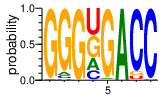

In [16]:
Image(filename='../Graphs/default_logo29.png')

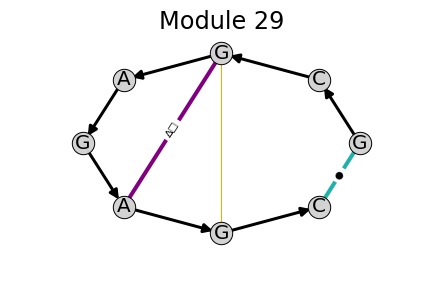

In [14]:
Image(filename='../Graphs/default_graph29.png')

Module 29 is a hairpin with a trans sugar-hoogstein non-canonical base pair, as well as a stacking.

# Building a dataset for a known motif

Rather than using the default dataset, it is also possible to train your own models. You will need a graph and an alignment, although we provide a database of graphs from rna3dmotif.

### The Kink-turn motif
A kink-turn was observed around positions 11 to 40 in PDB file 2GIS; and between positions 70 and 108 in 1S72. we can find these graphs in our dataset

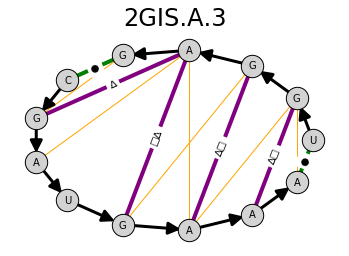

In [3]:
dataset =  pickle.load(open('../models/all_rna3dmotif_graphs.cPickle', 'rb'))
PDBs = ["2GIS"]
input_positions=[11,15,20,25,30,35,40]
graphs,ids = find_rna3dmotif_modules.parse_dataset_for_modules(dataset,PDBs,n_strands=2, input_positions = input_positions)
for g in range(len(graphs)):
    draw_single_graph.draw_graph(graphs[g],ids[g])

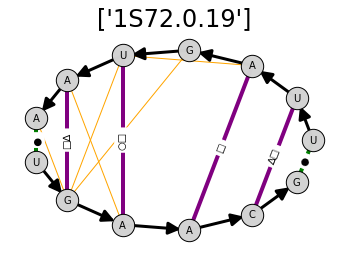

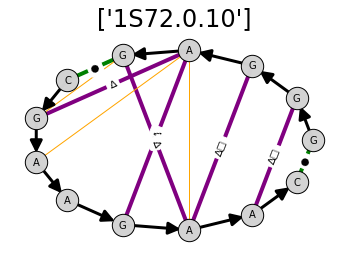

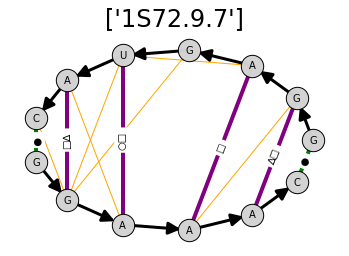

In [4]:
dataset =  pickle.load(open('../models/all_rna3dmotif_graphs.cPickle', 'rb'))
PDBs = ["1S72"]
input_positions=[70,72,74,76,78,80,82,84,86,88,91,92,95,97,98,100,102,105,108]
graphs,ids = find_rna3dmotif_modules.parse_dataset_for_modules(dataset,PDBs,n_strands=2,input_positions=input_positions)
for g in range(len(graphs)):
    draw_single_graph.draw_graph(graphs[g],ids[g])

We then associate these graphs to columns in a Rfam family alignment, for both family-structure match. 
Two types of files are needed:
* An alignment file, downloadable from Rfam: https://rfam.xfam.org/
* A .DESC graph file as suggested by BayesPairing at the previous step, found in our database: http://bayespairing.cs.mcgill.ca/static/Rna3dMotif_annotations.zip

In [5]:
pos = [91,92,93,94,95,109,110,111,112,113,114,115,116]
family_file = "../test/RF02540.afa.txt"
output_name = "../test/kturn_2540.fasta"
Rfam_to_module.rfam_to_module(pos, family_file,output_name)

pos2 = [19,21,22,40,41,54,55,56,59,60,61,62,64]
family_file2 = "../test/RF00162.afa.txt"
outputname2 = "../test/kturn_162.fasta"
Rfam_to_module.rfam_to_module(pos2, family_file2,outputname2)


and we can then train a motif, called rfam_kt, with BayesPairing2, as follows.

In [7]:
%run ../src/module_from_desc.py -g ../test/2GIS.A.3.desc -seq ../test/kturn_162.fasta -n KT
%run ../src/module_from_desc.py -g ../test/1S72.0.10.desc -seq ../test/kturn_2540.fasta -n KT

YOUR MODULE WAS ADDED TO DATASET  KT AND RECEIVED THE NUMBER 0  WITH  433  SEQUENCES
YOUR MODULE WAS ADDED TO DATASET  KT AND RECEIVED THE NUMBER 1  WITH  91  SEQUENCES


### The Sarcin-Ricin motif
We can repeat the same steps with the sarcin-ricin motif

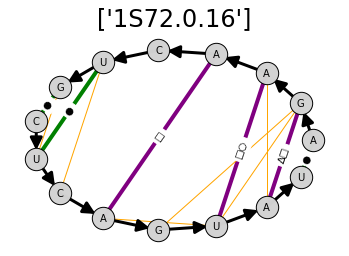

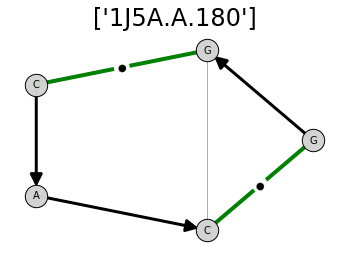

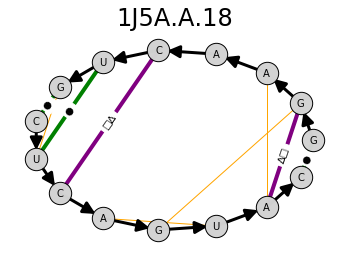

YOUR MODULE WAS ADDED TO DATASET  SR AND RECEIVED THE NUMBER 0  WITH  91  SEQUENCES
YOUR MODULE WAS ADDED TO DATASET  SR AND RECEIVED THE NUMBER 1  WITH  102  SEQUENCES


<Figure size 432x288 with 0 Axes>

In [8]:
%matplotlib inline

dataset =  pickle.load(open('../models/all_rna3dmotif_graphs.cPickle', 'rb'))
PDBs = ["1S72"]
input_positions=[150,160,170,180]
graphs,ids = find_rna3dmotif_modules.parse_dataset_for_modules(dataset,PDBs,n_strands=2,input_positions=input_positions)
for g in range(len(graphs)):
    draw_single_graph.draw_graph(graphs[g],ids[g])
    
dataset =  pickle.load(open('../models/all_rna3dmotif_graphs.cPickle', 'rb'))
PDBs = ["1J5A"]
input_positions=[163,168,172,176,180,184,188,192,196,200]
graphs,ids = find_rna3dmotif_modules.parse_dataset_for_modules(dataset,PDBs,n_strands=2,input_positions=input_positions)
for g in range(len(graphs)):
    draw_single_graph.draw_graph(graphs[g],ids[g])
    
pos = [427,428,429,430,432,433,434,441,442,443,444,446,447,448,449]
family_file = "../test/RF02541.afa.txt"
output_name = "gbulged_2541.fasta"
Rfam_to_module.rfam_to_module(pos, family_file,output_name)

pos = [238,239,240,241,242,243,244,251,252,253,254,255,256,257,258]
family_file = "../test/RF02540.afa.txt"
output_name = "gbulged_2540.fasta"
Rfam_to_module.rfam_to_module(pos, family_file,output_name)

%run ../src/module_from_desc.py -g ../test/1S72.0.16.desc -seq "gbulged_2540.fasta" -n SR
%run ../src/module_from_desc.py -g ../test/1J5A.A.18.desc -seq "gbulged_2541.fasta" -n SR


# Kink-turn identification on Rfam families RF0162 (SAM Riboswitch) and RF2540-2541 (large ribosomal subunit)


### Kink-turn search on RF0162 sequences and random alignments

In [23]:
#SEQUENCE SEARCH
%run ../src/parse_sequences.py -d rfam_kt -seq ../test/RF00162.fasta.txt -t -2.3 -o kturn_on_162

BayesPairing2 doesn't have models for this dataset and is training them; this could take 5 to 10 minutes. Once it is done, it will not need to be done again

RESULTS FOR ID AF027868.1/5245-5154
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	14.901	                   16-20,30-37	           UGGAG&CUAUGAAA	|
|	   1	-0.234	                   15-19,31-38	           GUGGA&UAUGAAAC	|
|	   1	-0.063	                   16-20,30-37	           UGGAG&CUAUGAAA	|

RESULTS FOR ID AF269983.1/571-671
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	 -1.64	                   17-21,30-37	           UGAGG&CCAUAGAA	|
|	   0	 6.525	                   16-20,31-38	           CUGAG&CAUAGAAG	|
|	   1	-2.095	                   31-38,62-66	           CACGG&CAUAGAAG	|
|	   1	-1.113	                   17-21,30-37	           UGAGG&CCAUAGAA	|
|	   1	-0.535	                   16-20,31-38	           CUGAG&CAUAGAAG	|

RESULTS FOR ID AJ000974.1/281-386
|	

In [2]:
#Sub-alignment search
align = AlignIO.read("../test/RF00162.stockholm.txt","stockholm")
ids = range(len(align))
for i in range(5):
    sub_align = MultipleSeqAlignment([], Gapped(IUPAC.unambiguous_rna, "-"))
    subaln = random.sample(ids,k=5)
    for x in subaln:
        align[x].id = align[x].id + str(x)
        sub_align.append(align[x])
    with open("subRF00162.stockholm.txt","w") as f:
        f.write(sub_align.format("stockholm"))
    %run ../src/parse_sequences.py -d KT5 --aln -seq ../test/subRF00162.stockholm.txt -mod 0 1 -o tutorial_kturn_on_162 -t -2.3


RESULTS FOR ID U36379.1/1-1061414/1-106
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	12.887	                   16-20,31-38	           CUGAG&CGAUGAAG	|
|	   1	-0.007	                   16-20,31-38	           CUGAG&CGAUGAAG	|

|	MODULE	N HITS	PERCENTAGE	|
|	   0	     1	       1.0	|
|	   1	     1	       1.0	|

TOTAL TIME: 38.384

RESULTS FOR ID U36379.1/1-1061414/1-106
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	12.876	                   16-20,31-38	           CUGAG&CGAUGAAG	|
|	   1	-0.018	                   16-20,31-38	           CUGAG&CGAUGAAG	|

|	MODULE	N HITS	PERCENTAGE	|
|	   0	     1	       1.0	|
|	   1	     1	       1.0	|

TOTAL TIME: 36.704

RESULTS FOR ID U36379.1/1-1061414/1-106
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	12.886	                   16-20,31-38	           CUGAG&CGAUGAAG	|
|	   1	-0.007	                   16-20,31-38	           CUGAG&CGAUGAAG	|

|	MOD

### Kink-turn search on RF2540 sequences and random alignments

In [3]:
from Bio import SeqIO
#Sequence search
with open("../test/RF02540short.fasta.txt","w") as f:
    for row,record in enumerate(SeqIO.parse("../test/RF02540.fasta.txt", "fasta")):
        this_seq = str(record.seq)
        this_id = str(record.id)
        bad_seq = False
        for char in list(this_seq):
            this_seq=list(this_seq)
            if char not in ["A","C","G","U"]:
                bad_seq=True
        this_seq="".join(this_seq)
        if not bad_seq:
            f.write(">"+this_id+"\n")
            f.write(this_seq[:200]+"\n")
        
%run ../src/parse_sequences.py -d KT -seq ../test/RF02540short.fasta.txt -t -2.3


RESULTS FOR ID AE004437.1/1877501-1880414
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	 8.996	                  80-84,96-103	           GGGAG&CUAAGAAC	|
|	   1	 0.163	                   40-44,49-56	           GGAUG&CGAAGGAC	|
|	   1	13.273	                  80-84,96-103	           GGGAG&CUAAGAAC	|

RESULTS FOR ID CP002839.1/2729290-2732206
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	 1.878	                  80-84,96-103	           GGGAC&GGAAGAAC	|
|	   1	 11.49	                  80-84,96-103	           GGGAC&GGAAGAAC	|

RESULTS FOR ID CP001404.1/1450307-1453357
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	 4.371	                  80-84,96-103	           GGUAG&CUUUGAAC	|
|	   1	13.655	                  80-84,96-103	           GGUAG&CUUUGAAC	|

RESULTS FOR ID AEMC01000045.1/292-3289
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   1	-2.246	      

In [ ]:
#alignment search
align = AlignIO.read("RF02540.stockholm.txt","stockholm")
ids = range(len(align))
for i in range(20):
    sub_align = MultipleSeqAlignment([], Gapped(IUPAC.unambiguous_rna, "-"))
    subaln = random.sample(ids,k=5)
    for x in subaln:
        align[x].id = align[x].id + str(x)
        align[x].seq = align[x].seq[0:200]
        sub_align.append(align[x])
    with open("subRF02540.stockholm.txt","w") as f:
        f.write(sub_align.format("stockholm"))
    %run ../src/parse_sequences.py -d kturn --aln -seq ../test/subRF02540.stockholm.txt -mod 0 1 -o tutorial_kturn_on_162 -t 5

### Kink-turn search on RF2541 sequences and random alignments

In [4]:
with open("../test/RF02541short.fasta.txt","w") as f:
    for row,record in enumerate(SeqIO.parse("../test/RF02541.fasta.txt", "fasta")):
        this_seq = str(record.seq)
        this_id = str(record.id)

        f.write(">"+this_id+"\n")
        f.write(this_seq[:200]+"\n")
%run ../src/parse_sequences.py -d KT -seq ../test/RF02541short.fasta.txt -t -2.3 -o tutorial_kturn_on_162


RESULTS FOR ID X68433.1/1-2932
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	-0.848	                   53-57,68-75	           GGACG&CGAUAUGC	|
|	   0	-0.444	                   56-60,88-95	           CGGGA&UAAGCAAG	|
|	   0	 2.186	                  80-84,96-103	           GGGAG&CUUUGAUC	|
|	   1	-2.137	                 10-17,190-194	           GGAAC&GAAAGGGC	|
|	   1	-1.276	                   41-45,58-65	           GGAGC&GGACGAAC	|
|	   1	-0.123	                   53-57,68-75	           GGACG&CGAUAUGC	|
|	   1	 1.527	                   58-65,81-85	           GGAGC&GGACGAAC	|
|	   1	 7.966	                  80-84,96-103	           GGGAG&CUUUGAUC	|

RESULTS FOR ID ABKZ01000640.1/3023-133
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	-2.136	                 24-28,189-196	           UGGAU&AACUGAAA	|
|	   0	-0.299	                  80-84,97-104	           GGGAG&CUUUGAUC	|
|	   1	-1.837	                 23-30,187-191	   

In [ ]:
#alignment search
align = AlignIO.read("RF02541.stockholm.txt","stockholm")
ids = range(len(align))
for i in range(20):
    sub_align = MultipleSeqAlignment([], Gapped(IUPAC.unambiguous_rna, "-"))
    subaln = random.sample(ids,k=5)
    #print(subaln)
    for x in subaln:
        align[x].id = align[x].id + str(x)
        align[x].seq = align[x].seq[0:200]
        sub_align.append(align[x])
    #print(sub_align.format("stockholm"))
    with open("subRF02541.stockholm.txt","w") as f:
        f.write(sub_align.format("stockholm"))
    %run ../src/parse_sequences.py -d kturn --aln -seq ../test/subRF02541.stockholm.txt -mod 0 1 -o tutorial_kturn_on_162 -t 5

# Sarcin-Ricin identification on Rfam families RF2541  and RF2540

### Sarcin-Ricin search on RF2540 sequences and random alignments

In [ ]:
align = AlignIO.read("RF02540.stockholm.txt","stockholm")
ids = range(len(align))

for i in range(20):
    sub_align = MultipleSeqAlignment([], Gapped(IUPAC.unambiguous_rna, "-"))
    subaln = random.sample(ids,k=5)
    print(subaln)
    for x in subaln:
        align[x].id = align[x].id + str(x)
        print("ADDING SEQUENCE",align[x].seq[150:300])
        if len (align[x].seq[150:300])<150:
            continue
        align[x].seq = align[x].seq[150:300]
        sub_align.append(align[x])
    print(sub_align.format("stockholm"))
    with open("subSRRF02540.stockholm.txt","w") as f:
        f.write(sub_align.format("stockholm"))
    %run ../src/parse_sequences.py -d SR --aln -seq ../test/subSRRF02540.stockholm.txt -mod 0 1  -t 5


In [5]:
with open("../test/RF02540srshort.fasta.txt","w") as f:
    for row,record in enumerate(SeqIO.parse("../test/RF02540.fasta.txt", "fasta")):
        this_seq = str(record.seq)
        this_id = str(record.id)
        bad_seq = False
        for char in list(this_seq):
            this_seq=list(this_seq)
            if char not in ["A","C","G","U"]:
                print("bad character, sequence ignored")
                bad_seq=True
        this_seq="".join(this_seq)
        if not bad_seq:
            f.write(">"+this_id+"\n")
            f.write(this_seq[150:350]+"\n")
%run ../src/parse_sequences.py -mod 0 1 -d SR -seq ../test/RF02540srshort.fasta.txt -t -2.3

bad character, sequence ignored
bad character, sequence ignored
bad character, sequence ignored
bad character, sequence ignored
bad character, sequence ignored
bad character, sequence ignored
bad character, sequence ignored
bad character, sequence ignored
BayesPairing2 doesn't have models for this dataset and is training them; this could take 5 to 10 minutes. Once it is done, it will not need to be done again

RESULTS FOR ID AE004437.1/1877501-1880414
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	 5.677	                   61-68,76-82	         UGAACGC&GUUAGUAA	|
|	   0	14.439	                   11-17,24-31	         GGAAUUG&CUCAGUAC	|
|	   1	 4.204	                   61-68,76-82	         UGAACGC&GUUAGUAA	|
|	   1	13.217	                   11-17,24-31	         GGAAUUG&CUCAGUAC	|

RESULTS FOR ID CP002839.1/2729290-2732206
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	 7.169	                   63-70,78-84	         UGAAC

### Sarcin-Ricin search on RF2541 sequences and random alignments

In [28]:
with open("../test/RF02541srshort.fasta.txt","w") as f:
    for row,record in enumerate(SeqIO.parse("../test/RF02541.fasta.txt", "fasta")):
        this_seq = str(record.seq)
        this_id = str(record.id)
        bad_seq = False
        for char in list(this_seq):
            this_seq=list(this_seq)
            if char not in ["A","C","G","U"]:
                print("bad character")
                bad_seq=True
        this_seq="".join(this_seq)
        if not bad_seq:
            f.write(">"+this_id+"\n")
            f.write(this_seq[170:370]+"\n")
%run ../src/parse_sequences.py -mod 0 1 -d rfam_sr -seq ../test/RF02541srshort.fasta.txt -t -2.3 -o tutorial_SR_on_2541 


RESULTS FOR ID X68433.1/1-2932
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	-2.176	                   70-77,85-91	         CAAAACG&CUGAGUAG	|
|	   0	14.458	                   20-26,33-40	         GGAACUG&CUAAGUAC	|
|	   1	-2.217	                   71-77,85-92	         UGAGUAG&CAAAACGG	|
|	   1	 -0.32	                   20-26,33-40	         GGAACUG&CUAAGUAC	|
|	   1	  0.58	                   70-77,85-91	         CAAAACG&CUGAGUAG	|

RESULTS FOR ID ABKZ01000640.1/3023-133
|	MODULE	 SCORE	              MODULE POSITIONS	                 SEQUENCE	|
|	   0	12.082	                   67-74,82-88	         CGAACGG&CUUAGUAG	|
|	   0	14.441	                   17-23,30-37	         GGAACUG&CUAAGUAC	|
|	   1	-1.939	                97-103,141-148	         CCUUAAG&CCAUAGUG	|
|	   1	  -1.9	                 71-78,171-177	         GGAUCUU&GUAGUGGC	|
|	   1	-1.703	                 90-96,150-157	         GAUUAGC&GUGAUAGC	|
|	   1	-1.492	                 60-67,182-188	   

In [ ]:
align = AlignIO.read("RF02541.stockholm.txt","stockholm")
print(align)

ids = range(len(align))

for i in range(20):
    sub_align = MultipleSeqAlignment([], Gapped(IUPAC.unambiguous_rna, "-"))
    subaln = random.sample(ids,k=5)
    #print(subaln)
    for x in subaln:
        align[x].id = align[x].id + str(x)
        if len (align[x].seq[150:500])<350:
            continue
        align[x].seq = align[x].seq[150:500]
        sub_align.append(align[x])
    #print(sub_align.format("stockholm"))
    with open("subSRRF02541.stockholm.txt","w") as f:
        f.write(sub_align.format("stockholm"))
    %run ../src/parse_sequences.py -d rfam_sr --aln -seq ../test/subSRRF02541.stockholm.txt -mod 0 1 -o tutorial_kturn_on_162 -t 5

# Investigating cobalamin riboswitch folding

We are interested in learning structural patterns in cobalamin sequences in order to predict on new sequences. To this purpose, we identify 3D modules in the cobalamin structure
#### MODULE 0 : JUNCTION

In [ ]:
pos = [83,84,85,86,87, 141, 142, 143, 144, 155, 156, 157, 414,415, 416, 417, 418]
family_file = "RF00174.afa.txt"
output_name = "junc_cobalamin.fasta"
rfam_to_module(pos, family_file,output_name)

%run ../src/module_from_desc.py -g ../test/4GXY.A.1.DESC -seq ../test/junc_cobalamin.fasta -n cob

In [ ]:
#### MODULE 1-2 : ILs

In [ ]:
pos = [159,160, 161, 162, 165, 405, 407, 408, 409, 410, 411]
family_file = "RF00174.afa.txt"
output_name = "IL1_cobalamin.fasta"
rfam_to_module(pos, family_file,output_name)

pos = [227, 228, 229, 405, 407, 408, 409, 410, 411]
family_file = "RF00174.afa.txt"
output_name = "IL2_cobalamin.fasta"
rfam_to_module(pos, family_file,output_name)

%run ../src/module_from_desc.py -g ../test/4GXY.A.4.DESC -seq ../test/IL1_cobalamin.fasta -n cob
%run ../src/module_from_desc.py -g ../test/4GXY.A.5.DESC -seq ../test/IL2_cobalamin.fasta -n cob

In [ ]:
#### MODULES 3-4 : hairpins

In [ ]:
pos = [96, 98, 99, 100, 132, 133, 134, 135, 136]
family_file = "RF00174.afa.txt"
output_name = "HL1_cobalamin.fasta"
rfam_to_module(pos, family_file,output_name)

pos = [146, 147, 148,  150, 151, 153]
family_file = "RF00174.afa.txt"
output_name = "HL2_cobalamin.fasta"
rfam_to_module(pos, family_file,output_name)

%run ../src/module_from_desc.py -g ../test/4GXY.A.2.DESC -seq ../test/HL1_cobalamin.fasta -n cob
%run ../src/module_from_desc.py -g ../test/4GXY.A.3.DESC -seq ../test/HL2_cobalamin.fasta -n cob

In [ ]:
%run ../src/display_modules.py -n cob

In [ ]:
def run_cobalamin(seq):

    %run ../src/parse_sequences.py -d cob -theta 1 -lambda 0.35 -mod 1 2 3 4 5 -seq $seq -t -2.3 -samplesize 10000 -o bob -w 500 --pretrained --interm

    first_result = 0
    second_result = 0

    results = pickle.load(open("../output/bob.pickle","rb"))
    print("RESULTS1", results)
    constraints_dict = {}

    
    
    #BEFORE : used 3 and 2 without a theta.
    for key in results:
        sorted_l = sorted(results[key], key=lambda x: x[2], reverse=True)
        for candidate in sorted_l:
            best_cand = candidate
            if best_cand[2]<12 and candidate!=sorted_l[0]:
                continue
            elif candidate==sorted_l[0] and best_cand[2]<11:
                continue
            overlap = False
            for component in best_cand[1]:
                if any(x in component for x in list(constraints_dict.keys())):
                    overlap = True
            if overlap:
                continue
            pos = best_cand[1]
            if key == 2:
                if len(pos[0])==5:
                    constraints_dict[pos[0][0]] = "("
                    constraints_dict[pos[0][1]] = "x"
                    constraints_dict[pos[0][2]] = "x"
                    constraints_dict[pos[0][3]] = "x"
                    constraints_dict[pos[0][4]] = "("
                    constraints_dict[pos[1][0]] = ")"
                    constraints_dict[pos[1][1]] = "x"
                    constraints_dict[pos[1][2]] = "x"
                    constraints_dict[pos[1][3]] = "x"
                    constraints_dict[pos[1][4]] = "x"
                    constraints_dict[pos[1][5]] = ")"
                else:
                    constraints_dict[pos[0][0]] = "("
                    constraints_dict[pos[0][1]] = "x"
                    constraints_dict[pos[0][2]] = "x"
                    constraints_dict[pos[0][3]] = "x"
                    constraints_dict[pos[0][4]] = "x"
                    constraints_dict[pos[0][5]] = "("
                    constraints_dict[pos[1][0]] = ")"
                    constraints_dict[pos[1][1]] = "x"
                    constraints_dict[pos[1][2]] = "x"
                    constraints_dict[pos[1][3]] = "x"
                    constraints_dict[pos[1][4]] = ")"


            elif key == 4:
                constraints_dict[pos[0][0]] = "("
                constraints_dict[pos[0][1]] = "x"
                constraints_dict[pos[0][2]] = "x"
                constraints_dict[pos[0][3]] = "x"
                constraints_dict[pos[0][4]] = "x"
                constraints_dict[pos[0][5]] = "x"
                constraints_dict[pos[0][6]] = "x"
                constraints_dict[pos[0][7]] = "x"
                constraints_dict[pos[0][8]] = ")"

            elif key == 5:
                constraints_dict[pos[0][0]] = "("
                constraints_dict[pos[0][1]] = "x"
                constraints_dict[pos[0][2]] = "x"
                constraints_dict[pos[0][3]] = "x"
                constraints_dict[pos[0][4]] = "x"
                constraints_dict[pos[0][5]] = ")"

            elif key==1:
                first_result = round(best_cand[2],2)

    cons = ""
    for i in range(len(seq)):
        if i in constraints_dict:
            cons += constraints_dict[i]
        else:
            cons += "."
    print(constraints_dict)
            
    %run ../src/parse_sequences.py -d cob -mod 1 -theta 25000 -lambda 0.2 -seq $seq -constraints  $cons -t 10 -samplesize 10000 -o bob2 -w 300 -s 50 --pretrained --interm
    results2 = pickle.load(open("../output/bob2.pickle","rb"))
    print("RESULTS2", results2)
    #if 1 in results2:
        #candidates = sorted(results2[1], key=lambda x: x[2], reverse=True)
        #second_result = round(candidates[0][2],2)
        
        
    return 

In [ ]:
### Testing on natural cobalamin sequences

In [ ]:
sequences = list(SeqIO.parse("RF00174.fasta","fasta"))

In [ ]:
improvements = []
counter = 0
for record in sequences[20:30]:
    print(record.id)
    results = run_cobalamin(str(record.seq))
    print("RESULTS",results)
    improvements.append(results)
    #if counter==9:
    #    break
    counter+=1
print(improvements)

In [ ]:
### Testing on shuffled cobalamin sequences

In [ ]:
seqs = list(SeqIO.parse(open("cobshuf.fasta","r"),"fasta"))

In [ ]:
for s in seqs[:10]:
    results = run_cobalamin(str(s.seq))
    print(results)

# BayesPairing2 validation
Here, we will cover the validation methods presented in the paper.

### Two-fold cross-validation

#### On natural sequences
We tested BP2 on the natural sequences used to train it, using two-fold cross-validation. Note that the output of the cross-validation scripts is very long (200k + lines) and requires more files available on our website (the all_graphs_pickled folder), so we provide the script with a pickle of the output, which is a list of lists with the results for each module.

In [21]:
def get_accuracy(ALL_RESULTS):
    res = []
    tot_seqs = 0
    for mod in sorted(list(ALL_RESULTS.keys())):
        if len(ALL_RESULTS[mod])>100:
            continue #in case there was a bug

        tot_seqs+=len(ALL_RESULTS[mod])
        mod_res = []
        if len(cv_results[mod])==0:
            mod_res.append(0)
        for i in ALL_RESULTS[mod]:
            if len(i)==0:
                mod_res.append(0)
            else:
                i.sort(key=lambda k: (k[2]),reverse=True)
                mod_res.append(max([i[x][0] for x in range(len(i[:1]))])) #use i[:5] for top 5
        res.append(round(statistics.mean(mod_res),2))
    print("AVERAGE SENSITIVITY:",statistics.mean(res),"ON ",tot_seqs, "SEQUENCES")
    print(res)

In [ ]:
%run ../src/validation_3dmotif.py

In [35]:
cv_results = pickle.load(open("../output/2fold_RECOMB.pickle","rb"))

In [36]:
get_accuracy(cv_results)

AVERAGE SENSITIVITY: 0.7575999999999999 ON TOT SEQ 6380
[1.0, 0.99, 0.99, 0.97, 0.83, 0.99, 0.77, 0.79, 0.72, 0.38, 0.73, 1.0, 1.0, 0.89, 0.96, 1.0, 0.62, 0.74, 0.11, 0.29, 0.05, 0.46, 0.37, 0.97, 0.52, 0.67, 0.68, 0.83, 1.0, 0.96, 0.9, 0.88, 0.99, 0.58, 1.0, 0.71, 0.82, 0.99, 0.52, 0.7, 0.98, 1.0, 1.0, 0.23, 0.85, 0.87, 0.51, 0.98, 0.44, 0.26, 0.99, 0.78, 0.96, 0.98, 0.33, 0.77, 0.58, 1.0, 0.91, 0.82, 0.97, 0.86, 0.57, 0.87, 0.99, 1.0, 0.7, 0.86, 0.94, 0.54, 0.97, 0.73, 0.31, 0.87, 0.03]


#### On shuffled sequences

In [ ]:
%run ../src/validation_shuffled.py

In [23]:
cv_results = pickle.load(open("../output/shuffled_RECOMB.pickle","rb"))

In [24]:
get_accuracy(cv_results)

AVERAGE SENSITIVITY: 0.0832 ON TOT SEQ 5038
[0.01, 0.05, 0.04, 0.03, 0.04, 0.04, 0.06, 0.02, 0.03, 0.04, 0.04, 0.0, 0.04, 0.03, 0.05, 0.08, 0.05, 0.07, 0.04, 0.04, 0.02, 0.01, 0.03, 0.1, 0.09, 0.11, 0.05, 0.07, 0.22, 0.08, 0.07, 0.0, 0.02, 0.12, 0.11, 0.09, 0.05, 0.08, 0.11, 0.07, 0.23, 0.22, 0.07, 0.0, 0.04, 0.06, 0.08, 0.09, 0.04, 0.05, 0.06, 0.1, 0.09, 0.22, 0.16, 0.16, 0.08, 0.18, 0.09, 0.1, 0.08, 0.11, 0.11, 0.14, 0.06, 0.35, 0.12, 0.11, 0.04, 0.11, 0.2, 0.1, 0.08, 0.07, 0.14]


#### On sequences with secondary structures

In [ ]:
%run ../src/validation_ss.py

In [1]:
cv_results = pickle.load(open("../output/ss_RECOMB.pickle","rb"))

NameError: name 'pickle' is not defined

In [2]:
get_accuracy(cv_results)

NameError: name 'get_accuracy' is not defined

### computation of performance metrics

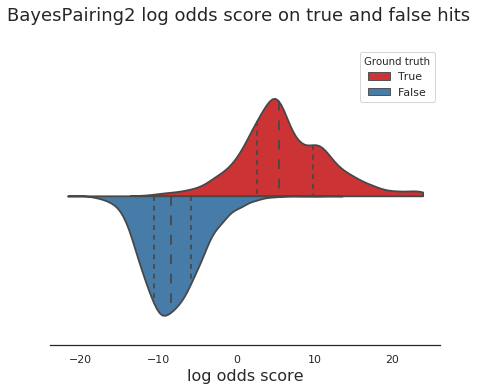

CUTOFF -0.955 MCC 0.878 FPR 0.038 FDR 0.04 F1 0.937


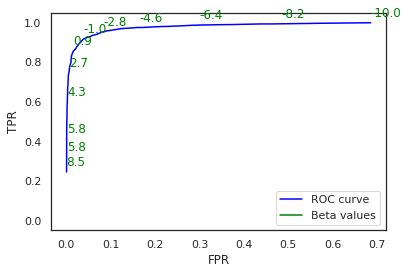

In [42]:
%run ../src/FDR.py